We will build a classifier that takes an image of the handwritten digit and outputs a label 0-9. We will look at a particularly simple strategy for this problem known as teh nearest neighbor classifier.
1. The MNIST dataset
"MNIST" is a classic dataset in machine learning, consisting of 28x28 gray-scale images handwritten digits. The original training set contains 600,000 examples and the test set contains 10,000 examples. In this notebook we will be working with a subset of this data: a training set of 7500 examples and a test set of 1,000 examples.

**1. The MNIST dataset**

four files are available in this package
* training set images
* training set labels
* test set images
* test set labels

these files are not in any standard image format. you have to write your own program to read them.  

In [13]:
import numpy as np
import time
import matplotlib.pyplot as plt 

In [3]:
# Load the training set
train_data=np.load("../data/train_data.npy")
train_labels=np.load("../data/train_labels.npy")

test_data=np.load("../data/test_data.npy")
test_labels=np.load("../data/test_labels.npy")

In [4]:
# print out data dimensions
print("Training dataset dimensions: ", np.shape(train_data))
print("no of training labels: ", len(train_labels))
print("Testing dataset dimensions: ", np.shape(test_data))
print("no of testing labels: ", len(test_labels))

Training dataset dimensions:  (7500, 784)
no of training labels:  7500
Testing dataset dimensions:  (1000, 784)
no of testing labels:  1000


In [5]:
# compute the number of examples of each digit:
train_digits, train_counts=np.unique(train_labels, return_counts=True)
print("Training set distribution:")
print(dict(zip(train_digits, train_counts)))

test_digit, test_counts=np.unique(test_labels, return_counts=True)

print("Test set distribution:")
print(dict(zip(test_digit, test_counts)))

Training set distribution:
{0: 750, 1: 750, 2: 750, 3: 750, 4: 750, 5: 750, 6: 750, 7: 750, 8: 750, 9: 750}
Test set distribution:
{0: 100, 1: 100, 2: 100, 3: 100, 4: 100, 5: 100, 6: 100, 7: 100, 8: 100, 9: 100}


**2. Visualizing the data**

Each data point is stored as 784-dimensional vector. To visualize a data point,
we first reshape it to a 28x28 image.

Define a function that displays a  digit given its vector representation:

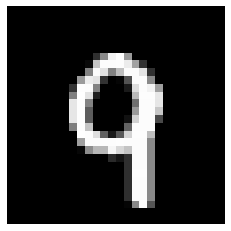

label: 9


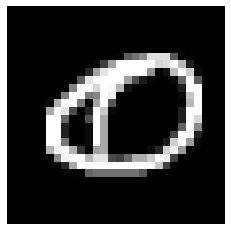

label: 0


In [6]:
def show_digit(x):
    plt.axis('off')
    plt.imshow(x.reshape((28, 28)), cmap=plt.cm.gray)
    plt.show()
    return
    
    
# Define a function that takes an index into a 
# particular dataset ("train" or "test") and displays that image
def vis_image(index, dataset="train"):
    if dataset=="train":
        show_digit(train_data[index,])
        label=train_labels[index]
        
    else:
        show_digit(test_data[index,])
        label=test_labels[index]
    
    print("label: "+str(label))
    return

# View the first data point in tha training set
vis_image(0, "train")

# View the first data point in the test set
vis_image(0, "test")

3. Squared euclidean distance
    * To compute nearest neighbors in our dataset, we need to compute distance between the data points. A natural distance function is euclidean distance.

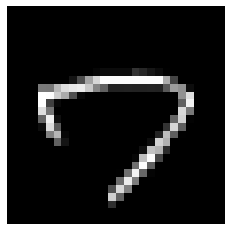

label: 7


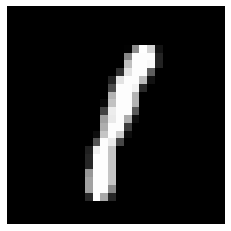

label: 1
Distance from 7 to 1:  5357193.0


In [7]:
# Function that computes squared euclidean distance between 2 vectors
def squared_dist(x, y):
    return np.sum(np.square(x-y))

# Compute distance between a seven and a one in our training set.
vis_image(4, "train")
vis_image(5, "train")

print("Distance from 7 to 1: ", squared_dist(train_data[4, ], train_data[5, ]))

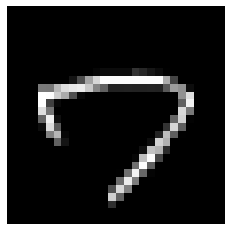

label: 7


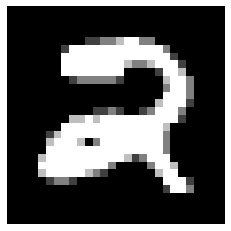

label: 2
Distance from 7 to 2:  12451684.0


In [8]:
# Compute distance between seven and a two in our training set
vis_image(4, "train")
vis_image(1, "train")

print("Distance from 7 to 2: ", squared_dist(train_data[4, ], train_data[1, ]))

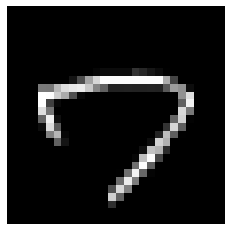

label: 7


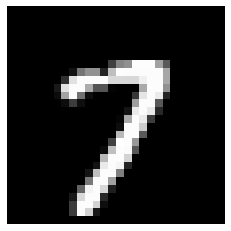

label: 7
Distance from 7 to 7:  5223403.0


In [9]:
# Compute distance between two sevens in our training set
vis_image(4, "train")
vis_image(7, "train")

print("Distance from 7 to 7: ", squared_dist(train_data[4, ], train_data[7, ]))

### 4. Computing nearest neighbor
### Now that we have distance function defined, we can now turn to nearest neighbor classifier


A success case:
NN classification:  0
true label:  0
the test image: 


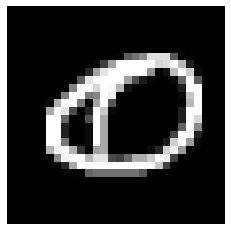

label: 0
the corressponding nearest neighbor image:


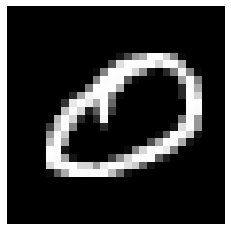

label: 0
A failure case: 
NN Classification:  2
true label:  3
the test image: 


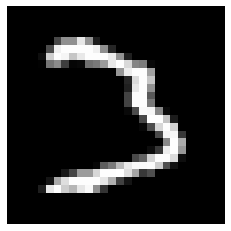

label: 3
the corressponding nearest neighbor image:


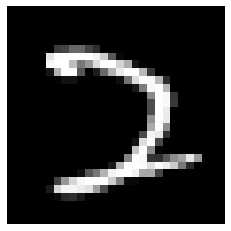

label: 2


In [11]:

# function takes a vector x and returns the index of the nearest neighbor in train_data
def find_NN(x):
#     find distance from x to every row in train_data
    distances=[squared_dist(x, train_data[i,]) for i in range(len(train_labels))]
#     get the index of the smallest distance
    return np.argmin(distances)


# function that takes a vector x and return the class of its nearest neighbor in train_data
def NN_classifier(x):
#     get the index of the nearest neighbor
    index=find_NN(x)
    return train_labels[index]

# A success case
print("A success case:")
print("NN classification: ", NN_classifier(test_data[0,]))
print("true label: ", test_labels[0])
print("the test image: ")
vis_image(0, "test")
print("the corressponding nearest neighbor image:")
vis_image(find_NN(test_data[0,]), "train")


# A failure case
print("A failure case: ")
print("NN Classification: ", NN_classifier(test_data[39, ]))
print("true label: ", test_labels[39])
print("the test image: ")
vis_image(39, "test")
print("the corressponding nearest neighbor image:")
vis_image(find_NN(test_data[39,]), "train")

    

### 5. processing the full test set
* let us apply our nearest neighbor classifier over the full dataset
* To classify each test point, our code takes a full pass over each of the 7500 training examples. Thus we should not expect testing to be very fast.


In [16]:
# processing the full test set
t_before=time.time()
test_predictions=[NN_classifier(test_data[i, ]) for i in range(len(test_labels))]
t_after=time.time()

# compute the error
err_positions=np.not_equal(test_predictions, test_labels)
error=float(np.sum(err_positions))/len(test_labels)

print("error of nearest neighbor classifier: ", error)
print("classification time(in seconds): ", t_after-t_before)

error of nearest neighbor classifier:  0.046
classification time(in seconds):  128.10508608818054


## 6. Faster nearest neighbor methods
* performing nearest neighbor classification in the way we have presented requires a full pass through the training set in order to classify the single point.
* fortunately there are faster methods to perform nearest neighbor. "scikit-learn" has fast implementations of 2 useful nearest neighbor data structures: the ball tree and the K-d tree.


In [19]:
# Faster nearest neighbor implementation
from sklearn.neighbors import BallTree

# build nearest neighbor structure on training data
t_before=time.time()
ball_tree=BallTree(train_data)
t_after=time.time()

# compute training time
t_training=t_after-t_before

print("time to bring data structure (seconds):", t_training)

# get nearest neighbor prediction on testing data
t_before=time.time()
test_neighbors=np.squeeze(ball_tree.query(test_data, k=1, return_distance=False))
ball_tree_predictions=train_labels[test_neighbors]
t_after=time.time()

# compute testing time
t_testing=t_after-t_before
print("time to classify test set(seconds): ", t_testing)

# verify that the predictions are the same
print("Ball tree produces same prediction as above: ")
np.array_equal(test_predictions, ball_tree_predictions)

time to bring data structure (seconds): 1.286330223083496
time to classify test set(seconds):  16.734264135360718
Ball tree produces same prediction as above: 


True

In [21]:
# Faster nearest neighbor implementation
from sklearn.neighbors import KDTree

# build nearest neighbor structure on training data
t_before=time.time()
kd_tree=KDTree(train_data)
t_after=time.time()

# compute training time
t_training=t_after-t_before

print("time to bring data structure (seconds):", t_training)

# get nearest neighbor prediction on testing data
t_before=time.time()
test_neighbors=np.squeeze(kd_tree.query(test_data, k=1, return_distance=False))
kd_tree_predictions=train_labels[test_neighbors]
t_after=time.time()

# compute testing time
t_testing=t_after-t_before
print("time to classify test set(seconds): ", t_testing)

# verify that the predictions are the same
print("KD tree produces same prediction as above: ")
np.array_equal(test_predictions, kd_tree_predictions)

time to bring data structure (seconds): 1.88824462890625
time to classify test set(seconds):  20.68999934196472
Ball tree produces same prediction as above: 


True